# Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### Data related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Data regarding other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### Output variable (desired target):

16 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series,read_csv
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.figure(figsize=(20,5))
plt.xticks(rotation=180)
%matplotlib inline

In [2]:
def convert_categorical_to_numeric(df,cols):
    return pd.concat([df.drop(cols, 1), pd.get_dummies(df[cols],prefix=cols)], axis = 1)

In [3]:
def convert_yes_no_to_0_1(df,cols):
    yes_no_mapping = {"yes": 1, "no": 0}
    for col in cols:
        df[col] = df[col].map(yes_no_mapping)
    return df

In [4]:
bank_data = read_csv('bank-full.csv',delimiter=';')

In [5]:
bank_data.shape

(45211, 17)

In [6]:
bank_data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [7]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
convert_yes_no_to_0_1(bank_data,['default','housing','loan','y'])
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


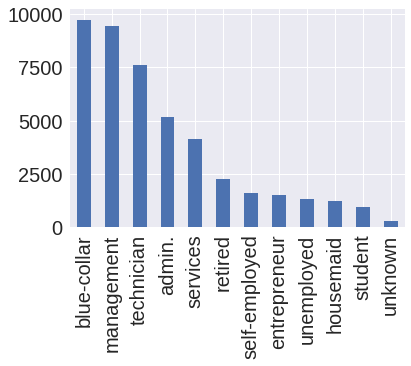

In [9]:
bank_data['job'].value_counts().plot(kind='bar')

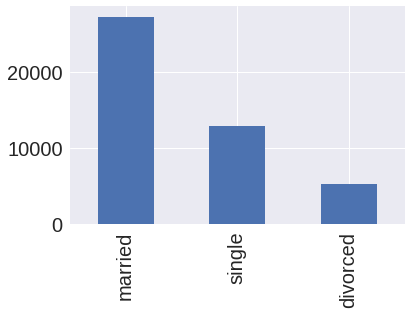

In [10]:
bank_data['marital'].value_counts().plot(kind='bar')

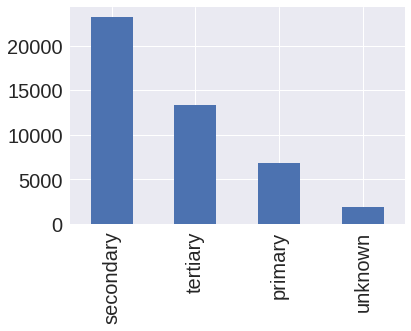

In [11]:
bank_data['education'].value_counts().plot(kind='bar')

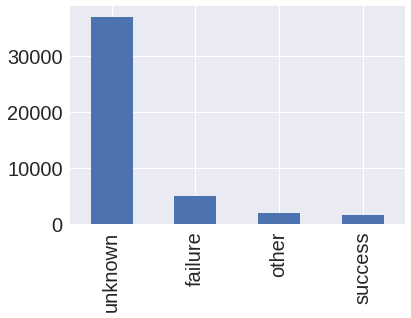

In [12]:
bank_data['poutcome'].value_counts().plot(kind='bar')

In [13]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [14]:
bank_data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [15]:
columns = ['contact','day','month']
bank_data.drop(columns, 1,inplace=True)

In [16]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,198,1,-1,0,unknown,0


In [17]:
Y = bank_data.iloc[:,len(bank_data.columns)-1]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [18]:
X = bank_data.iloc[:,:len(bank_data.columns)-1]
X.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,0,2143,1,0,261,1,-1,0,unknown
1,44,technician,single,secondary,0,29,1,0,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,0,2,1,1,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,0,1506,1,0,92,1,-1,0,unknown
4,33,unknown,single,unknown,0,1,0,0,198,1,-1,0,unknown


In [19]:
X = convert_categorical_to_numeric(X,['job','marital','education','poutcome'])
X.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,job_admin.,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,261,1,-1,0,0,...,1,0,0,0,1,0,0,0,0,1
1,44,0,29,1,0,151,1,-1,0,0,...,0,1,0,1,0,0,0,0,0,1
2,33,0,2,1,1,76,1,-1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,92,1,-1,0,0,...,1,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,198,1,-1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
recommendor = LogisticRegression(penalty='l1')

In [22]:
recommendor.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
y_pred = recommendor.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer
accuracy_score(y_test, y_pred)

0.90010321439103513

In [25]:
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.92      0.98      0.95     11966
          1       0.65      0.32      0.43      1598

avg / total       0.88      0.90      0.88     13564



In [26]:
X_trial = X_train.iloc[3293,:]

In [27]:
X_trial

age                     33
default                  0
balance                117
housing                  0
loan                     1
duration               133
campaign                 2
pdays                   -1
previous                 0
job_admin.               0
job_blue-collar          0
job_entrepreneur         0
job_housemaid            0
job_management           1
job_retired              0
job_self-employed        0
job_services             0
job_student              0
job_technician           0
job_unemployed           0
job_unknown              0
marital_divorced         0
marital_married          1
marital_single           0
education_primary        0
education_secondary      0
education_tertiary       0
education_unknown        1
poutcome_failure         0
poutcome_other           0
poutcome_success         0
poutcome_unknown         1
Name: 13405, dtype: int64

In [28]:
recommendor.predict(X_trial)

/home/bhavesh/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0])

In [29]:
recommendor.predict_proba(X_trial)

/home/bhavesh/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.96819221,  0.03180779]])